In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Iris = pd.read_csv("/content/Iris.csv")

In [ ]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


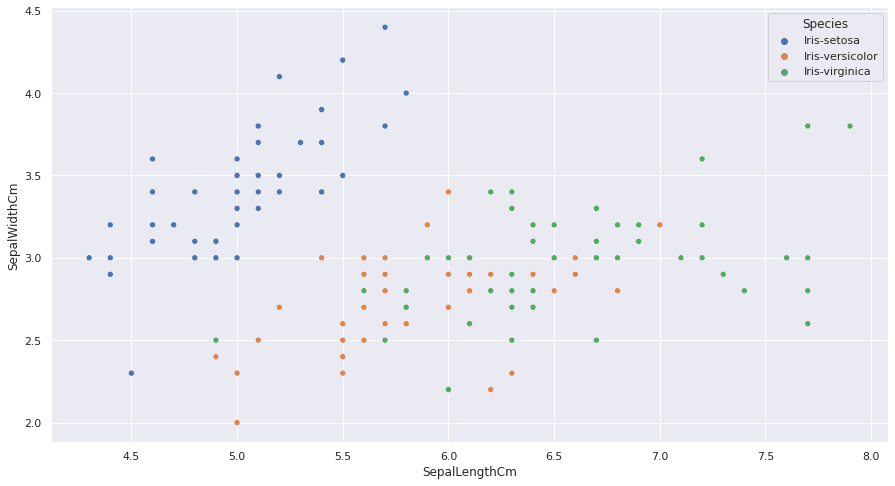

In [ ]:
#Data is clean
#Exploratory Data Analysis With Iris
plt.figure(figsize = (15,8))
sns.set(style="darkgrid")
sns.scatterplot(data=Iris,x="SepalLengthCm",y='SepalWidthCm',hue="Species")

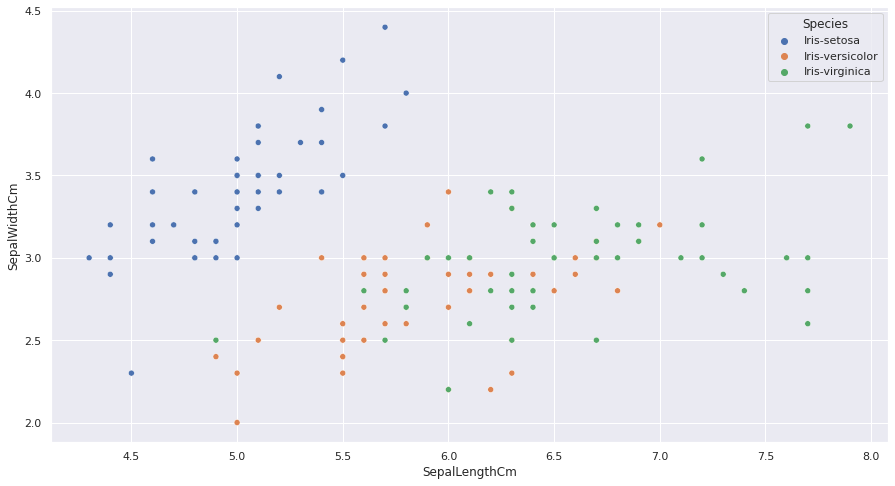

In [ ]:
plt.figure(figsize = (15,8))
sns.set(style="darkgrid")
sns.scatterplot(data=Iris,x="SepalLengthCm",y='SepalWidthCm',hue="Species")

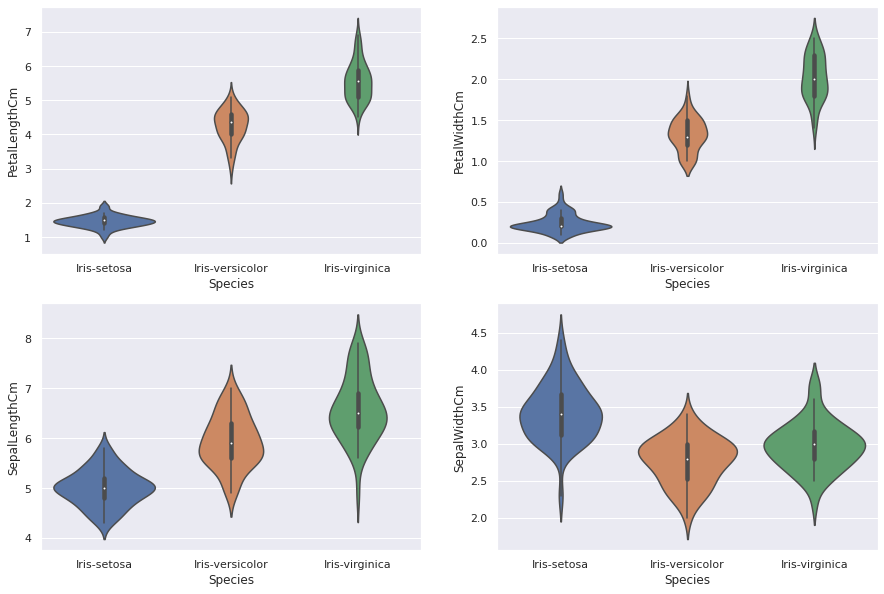

In [ ]:
#This plot clearly shows that Iris-setosa are very easy to identify whereas the other 2 are mostly similar in nature

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=Iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=Iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=Iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=Iris)

In [ ]:
#Train_Test_split
X=Iris[["PetalLengthCm","PetalWidthCm","SepalLengthCm","SepalWidthCm"]]
Y=Iris["Species"]

In [ ]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
Y=labelencoder_y.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=500)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#KNN
#Training model
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors =5, metric="minkowski",p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Testing model
y_pred = classifier.predict(X_test)
y_pred

array([0, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0,
       1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0,
       0])

In [ ]:
Y_test

array([0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0,
       1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0,
       0])

In [ ]:
#Model_evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(Y_test,y_pred)

In [ ]:
print(accuracy_score(Y_test, classifier.predict(X_test)))

0.9777777777777777


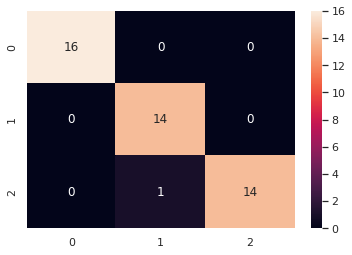

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.93      1.00      0.97        14
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

F1 Score is the weighted average of Precision and Recall. 

Support is the number of actual occurrences of the class in the specified dataset.



In [ ]:
#Logistic Regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_1 = LogisticRegression()
classifier_1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_1 = classifier_1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Y_test, classifier_1.predict(X_test)))

0.9777777777777777


In [ ]:
CM=confusion_matrix(Y_test, y_pred_1)

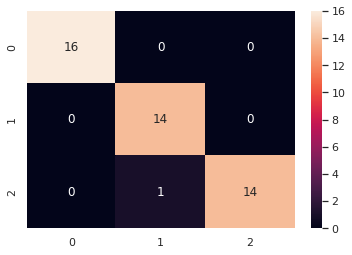

In [ ]:
sns.heatmap(CM,annot=True)

In [ ]:
CR=classification_report(Y_test, y_pred_1)

In [ ]:
print(CR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.93      1.00      0.97        14
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

